# 4. Logistic Regression

**Purpose:** Learn and revise **Logistic Regression** (binary classification) in Scikit-learn.

---

## What is Logistic Regression?

**Logistic regression** is used for **binary classification** (e.g. class 0 vs 1). It models the **probability** that \( y = 1 \) given features \( X \) using the **logistic (sigmoid)** function:

\[
P(y=1 \mid X) = \frac{1}{1 + e^{-z}}, \quad z = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n
\]

- The model outputs a probability between 0 and 1. We then apply a **threshold** (usually 0.5) to get a class label.
- Despite the name "regression", it is a **classification** algorithm. The "regression" refers to the linear part \( z \).


## Concepts to Remember

| Concept               | Description                                                                       |
| --------------------- | --------------------------------------------------------------------------------- |
| **Sigmoid**           | \( \sigma(z) = 1/(1+e^{-z}) \) maps any real \( z \) to (0, 1).                   |
| **Decision boundary** | Where \( P(y=1) = 0.5 \) → \( z = 0 \) → linear boundary in feature space.        |
| **Log loss**          | Loss function used for training (cross-entropy for binary).                       |
| **When to use**       | Binary classification when you want probabilities and a linear decision boundary. |


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Binary classification: two blobs
np.random.seed(42)
X0 = np.random.randn(50, 2) + np.array([1, 1])
X1 = np.random.randn(50, 2) + np.array([3, 3])
X = np.vstack([X0, X1])
y = np.array([0] * 50 + [1] * 50)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.95
Confusion matrix:
 [[12  0]
 [ 1  7]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



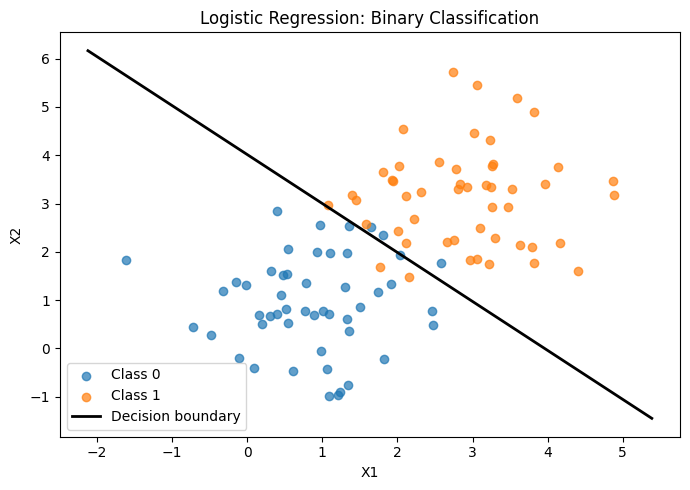

In [4]:
# Decision boundary (linear)
xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = -(model.coef_[0][0] * xx + model.intercept_[0]) / model.coef_[0][1]

plt.figure(figsize=(7, 5))
plt.scatter(X[y == 0, 0], X[y == 0, 1], alpha=0.7, label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.7, label="Class 1")
plt.plot(xx, yy, "k-", linewidth=2, label="Decision boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Logistic Regression: Binary Classification")
plt.tight_layout()
plt.show()

## Key Takeaways

- Use **LogisticRegression** for binary classification; **predict_proba** gives class probabilities.
- The decision boundary is **linear** in the feature space; for non-linear boundaries use other models or add polynomial features.
- **C** (inverse of regularization strength): smaller C = stronger regularization. **penalty** can be 'l1', 'l2', or 'elasticnet'.
